In [111]:
from subprocess import run, PIPE
from ast import literal_eval

In [148]:
res = run(
    "RScript.exe simple_motif_index.R data/cens/train_short_audio/acafly/XC109605.npy 50", 
    cwd="..", stdout=PIPE, stderr=PIPE
)
assert res.returncode == 0
literal_eval(res.stdout.decode())

[59, 101]

In [134]:
import librosa
import numpy as np

def cens_per_sec(sample_rate, target):
    """Ensure this value is a multiple of 2**6"""
    return (sample_rate // (target * (2 ** 6))) * (2 ** 6)

path = "../data/input/train_short_audio/acafly/XC109605.ogg"
data, sample_rate = librosa.load(path)
cens = librosa.feature.chroma_cens(data, sample_rate, hop_length=cens_per_sec(sample_rate, 10))
cens.shape

(12, 646)

In [149]:
import tempfile
from pathlib import Path

def get_motif_index(data, window_size, cwd=".."):
    with tempfile.NamedTemporaryFile(delete=False) as fp:
        np.save(fp, data)
        res = run(
            f"RScript.exe simple_motif_index.R {fp.name} {window_size}", 
            stdout=PIPE, stderr=PIPE, cwd=cwd
        )
    return literal_eval(res.stdout.decode())

idx = get_motif_index(cens, 50)

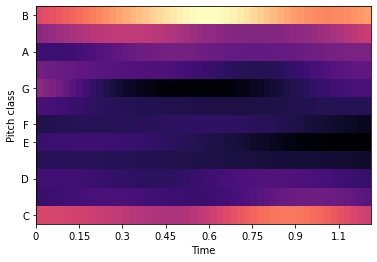

In [150]:
import matplotlib.pyplot as plt
import librosa.display

librosa.display.specshow(cens[:, idx[0]:idx[0]+50], y_axis="chroma", x_axis="time")

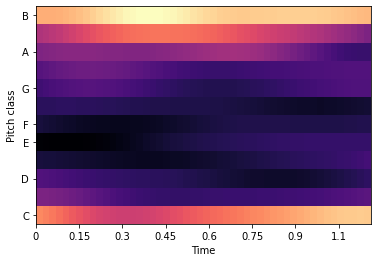

In [151]:
librosa.display.specshow(cens[:, idx[1]:idx[1]+50], y_axis="chroma", x_axis="time")

In [152]:
data.shape

(1404025,)

In [141]:
cens.shape[1]

646

In [142]:
def compute_offset(index, window_size, cens_total, data_total):
    a = int((index/cens_total)*data_total)
    b = int(((index+window_size)/cens_total)*data_total)
    return a, b

compute_offset(idx[0], 50, cens.shape[1], data.shape[0])

(128231, 236902)

In [143]:
import IPython.display as ipd

a, b = compute_offset(idx[0], 50, cens.shape[1], data.shape[0])
ipd.Audio(data[a:b], rate=sample_rate)

In [144]:
import soundfile as sf

In [145]:
sf.write("../data/2021-04-10-motif-1.ogg", data[a:b], sample_rate, format="ogg", subtype="vorbis")

In [146]:
a, b = compute_offset(idx[1], 50, cens.shape[1], data.shape[0])
ipd.Audio(data[a:b], rate=sample_rate)

In [147]:
sf.write("../data/2021-04-10-motif-2.ogg", data[a:b], sample_rate, format="ogg", subtype="vorbis")